In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from scipy.stats import pointbiserialr
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')
import xlrd
import openpyxl
from openpyxl import load_workbook
from IPython.display import Image, display

%matplotlib inline
sns.set_style('darkgrid')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.svm import SVR
from numpy import sqrt
from sklearn import preprocessing


import keras
from keras.models import Sequential
from keras.layers import *
import tensorflow as tf 
from tensorflow.keras import layers

from tensorflow import keras
import keras.callbacks 
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import pickle
import openpyxl


 

Цель - рзработать модель, которая будет предсказывать значения модуля упругости при растяжении и прочность при растяжении композитов на основе их состава и процесса производства. А также написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель.


Зачем это нужно: Композиты имеют такие структурные элементы, как матрица и нашивка. Матрица - материал, внутри которого располагается набивка. Нашивка  - это те компоненты, которые призваны усовершенствовать свойства. Прогнозные модели помогают сократить количество проводимых испытаний, так как процесс производства композитов может быть очень сложным, поскольку конечные свойства материала зависят от многих факторов, таких как температура, состав материала и многие другие. 

## Анализ, поготовка данных

In [2]:
X_nup = pd.read_excel("C:/Users/PDA/Cсылки на репозитории/Composits/Composits-Bauman-/DS/X_nup.xlsx",engine='openpyxl',index_col='Index')
X_bp = pd.read_excel("C:/Users/PDA/Cсылки на репозитории/Composits/Composits-Bauman-/DS/X_bp.xlsx",engine='openpyxl',index_col='Index')
# импорт данных 

In [3]:
X_nup.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040 entries, 0 to 1039
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Угол нашивки, град  1040 non-null   int64  
 1   Шаг нашивки         1040 non-null   float64
 2   Плотность нашивки   1040 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 32.5 KB


In [4]:
X_nup.shape

(1040, 3)

In [5]:
X_bp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10)
memory usage: 87.9 KB


In [6]:
X_bp.shape

(1023, 10)

In [7]:
df = X_nup.merge(X_bp, how='inner', on='Index') # объединение таблиц в один df



In [8]:
df


Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
Index                                                       
0                       0     4.000000          57.000000   
1                       0     4.000000          60.000000   
2                       0     4.000000          70.000000   
3                       0     5.000000          47.000000   
4                       0     5.000000          57.000000   
...                   ...          ...                ...   
1018                   90     9.076380          47.019770   
1019                   90    10.565614          53.750790   
1020                   90     4.161154          67.629684   
1021                   90     6.313201          58.261074   
1022                   90     6.078902          77.434468   

       Соотношение матрица-наполнитель  Плотность, кг/м3  \
Index                                                      
0                             1.857143       2030.000000   
1                             1.857143       2030.000000   
2                             1.857143       2030.000000   
3                             1.857143       2030.000000   
4                             2.771331       2030.000000   
...                                ...               ...   
1018                          2.271346       1952.087902   
1019                          3.444022       2050.089171   
1020                          3.280604       1972.372865   
1021                          3.705351       2066.799773   
1022                          3.808020       1890.413468   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
Index                                                       
0                 738.736842                    30.000000   
1                 738.736842                    50.000000   
2                 738.736842                    49.900000   
3                 738.736842                   129.000000   
4                 753.000000                   111.860000   
...                      ...                          ...   
1018              912.855545                    86.992183   
1019              444.732634                   145.981978   
1020              416.836524                   110.533477   
1021              741.475517                   141.397963   
1022              417.316232                   129.183416   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
Index                                                              
0                            22.267857                100.000000   
1                            23.750000                284.615385   
2                            33.000000                284.615385   
3                            21.250000                300.000000   
4                            22.267857                284.615385   
...                                ...                       ...   
1018                         20.123249                324.774576   
1019                         19.599769                254.215401   
1020                         23.957502                248.423047   
1021                         19.246945                275.779840   
1022                         27.474763                300.952708   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
Index                                                                        
0                         210.000000                             70.000000   
1                         210.000000                             70.000000   
2                         210.000000                             70.000000   
3                         210.000000                             70.000000   
4                         210.000000                             70.000000   
...                              ...                                   ...   
1018                      209.198700                             73.090961   
1019                      350.660830               

In [9]:
df.info() #пропусков нет


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Угол нашивки, град                    1023 non-null   int64  
 1   Шаг нашивки                           1023 non-null   float64
 2   Плотность нашивки                     1023 non-null   float64
 3   Соотношение матрица-наполнитель       1023 non-null   float64
 4   Плотность, кг/м3                      1023 non-null   float64
 5   модуль упругости, ГПа                 1023 non-null   float64
 6   Количество отвердителя, м.%           1023 non-null   float64
 7   Содержание эпоксидных групп,%_2       1023 non-null   float64
 8   Температура вспышки, С_2              1023 non-null   float64
 9   Поверхностная плотность, г/м2         1023 non-null   float64
 10  Модуль упругости при растяжении, ГПа  1023 non-null   float64
 11  Прочность при рас

In [10]:
df.shape

(1023, 13)

In [11]:
df.isna().sum()

Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
dtype: int64

In [12]:
df.sample(3)

Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
Index                                                       
777                    90     8.550560          59.167552   
701                    90     9.127882          54.495994   
950                    90     6.270970          60.483248   

       Соотношение матрица-наполнитель  Плотность, кг/м3  \
Index                                                      
777                           2.696131       1952.858510   
701                           4.412479       2089.504678   
950                           3.353945       1964.801437   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
Index                                                       
777               836.660801                   145.080522   
701               881.682475                   104.686346   
950               608.673260                   163.985672   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
Index                                                              
777                          22.069433                231.849879   
701                          23.452083                323.324868   
950                          23.393889                276.710021   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
Index                                                                        
777                        59.768061                             75.030517   
701                       268.217818                             72.197268   
950                       714.818313                             71.237408   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  
Index                                                          
777                      3088.905749               270.918853  
701                      1904.387117               269.041394  
950                      3321.035587               197.328325

In [13]:
df.columns

Index(['Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки',
       'Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2'],
      dtype='object')

In [14]:
df.describe()

Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
count         1023.000000  1023.000000        1023.000000   
mean            44.252199     6.899222          57.153929   
std             45.015793     2.563467          12.350969   
min              0.000000     0.000000           0.000000   
25%              0.000000     5.080033          49.799212   
50%              0.000000     6.916144          57.341920   
75%             90.000000     8.586293          64.944961   
max             90.000000    14.440522         103.988901   

       Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1023.000000       1023.000000   
mean                          2.930366       1975.734888   
std                           0.913222         73.729231   
min                           0.389403       1731.764635   
25%                           2.317887       1924.155467   
50%                           2.906878       1977.621657   
75%                           3.552660       2021.374375   
max                           5.591742       2207.773481   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1023.000000                  1023.000000   
mean              739.923233                   110.570769   
std               330.231581                    28.295911   
min                 2.436909                    17.740275   
25%               500.047452                    92.443497   
50%               739.664328                   110.564840   
75%               961.812526                   129.730366   
max              1911.536477                   198.953207   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1023.000000               1023.000000   
mean                         22.244390                285.882151   
std                           2.406301                 40.943260   
min                          14.254985                100.000000   
25%                          20.608034                259.066528   
50%                          22.230744                285.896812   
75%                          23.961934                313.002106   
max                          33.000000                413.273418   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1023.000000                           1023.000000   
mean                      482.731833                             73.328571   
std                       281.314690                              3.118983   
min                         0.603740                             64.054061   
25%                       266.816645                             71.245018   
50%                       451.864365                             73.268805   
75%                       693.225017                             75.356612   
max                      1399.542362                             82.682051   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  
count                    1023.000000              1023.000000  
mean                     2466.922843               218.423144  
std                       485.628006                59.735931  
min                      1036.856605                33.803026  
25%                      2135.850448               179.627520  
50%                      2459.524526               219.198882  
75%                      2767.193119               257.481724  
max                      3848.436732               414.590628

In [15]:
df_info = pd.DataFrame({
         "UniqueValues": df.nunique()
})

df_info

UniqueValues
Угол нашивки, град                               2
Шаг нашивки                                    989
Плотность нашивки                              988
Соотношение матрица-наполнитель               1014
Плотность, кг/м3                              1013
модуль упругости, ГПа                         1020
Количество отвердителя, м.%                   1005
Содержание эпоксидных групп,%_2               1004
Температура вспышки, С_2                      1003
Поверхностная плотность, г/м2                 1004
Модуль упругости при растяжении, ГПа          1004
Прочность при растяжении, МПа                 1004
Потребление смолы, г/м2                       1003

In [16]:
df['Угол нашивки, град'].unique()


array([ 0, 90], dtype=int64)

In [17]:
df['Угол нашивки, град'].replace({90: 1},inplace=True)
# угол нашивки отнесем к категории 

<AxesSubplot:>

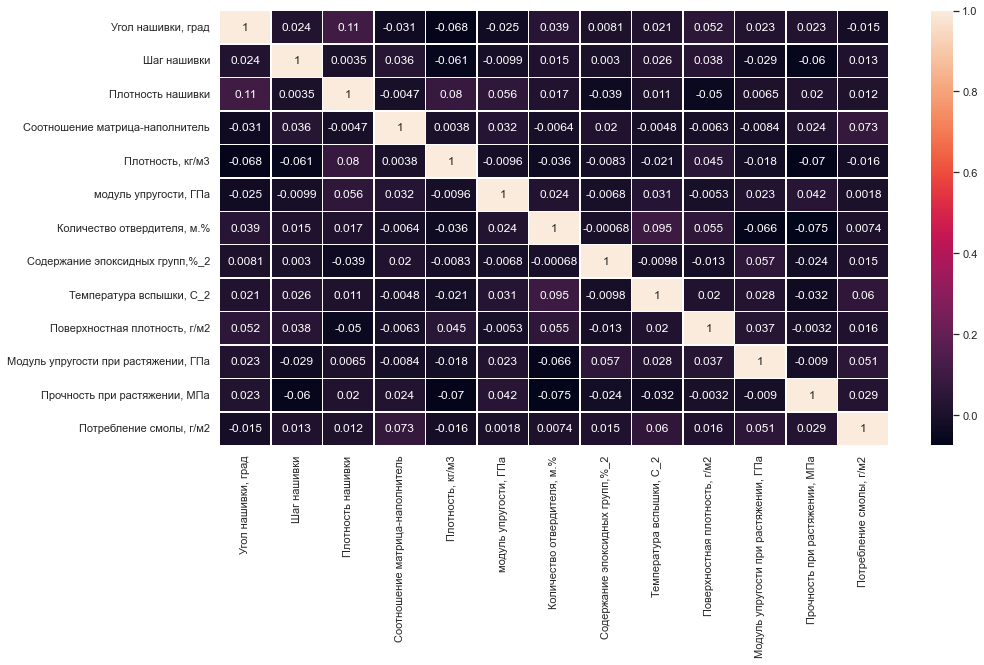

In [18]:
sns.set_theme(rc={"figure.figsize": (15, 8)})
sns.heatmap(df.corr(), annot=True, linewidth=.5)
#корреляция между признаками низкая, в модель будем включать все признаки

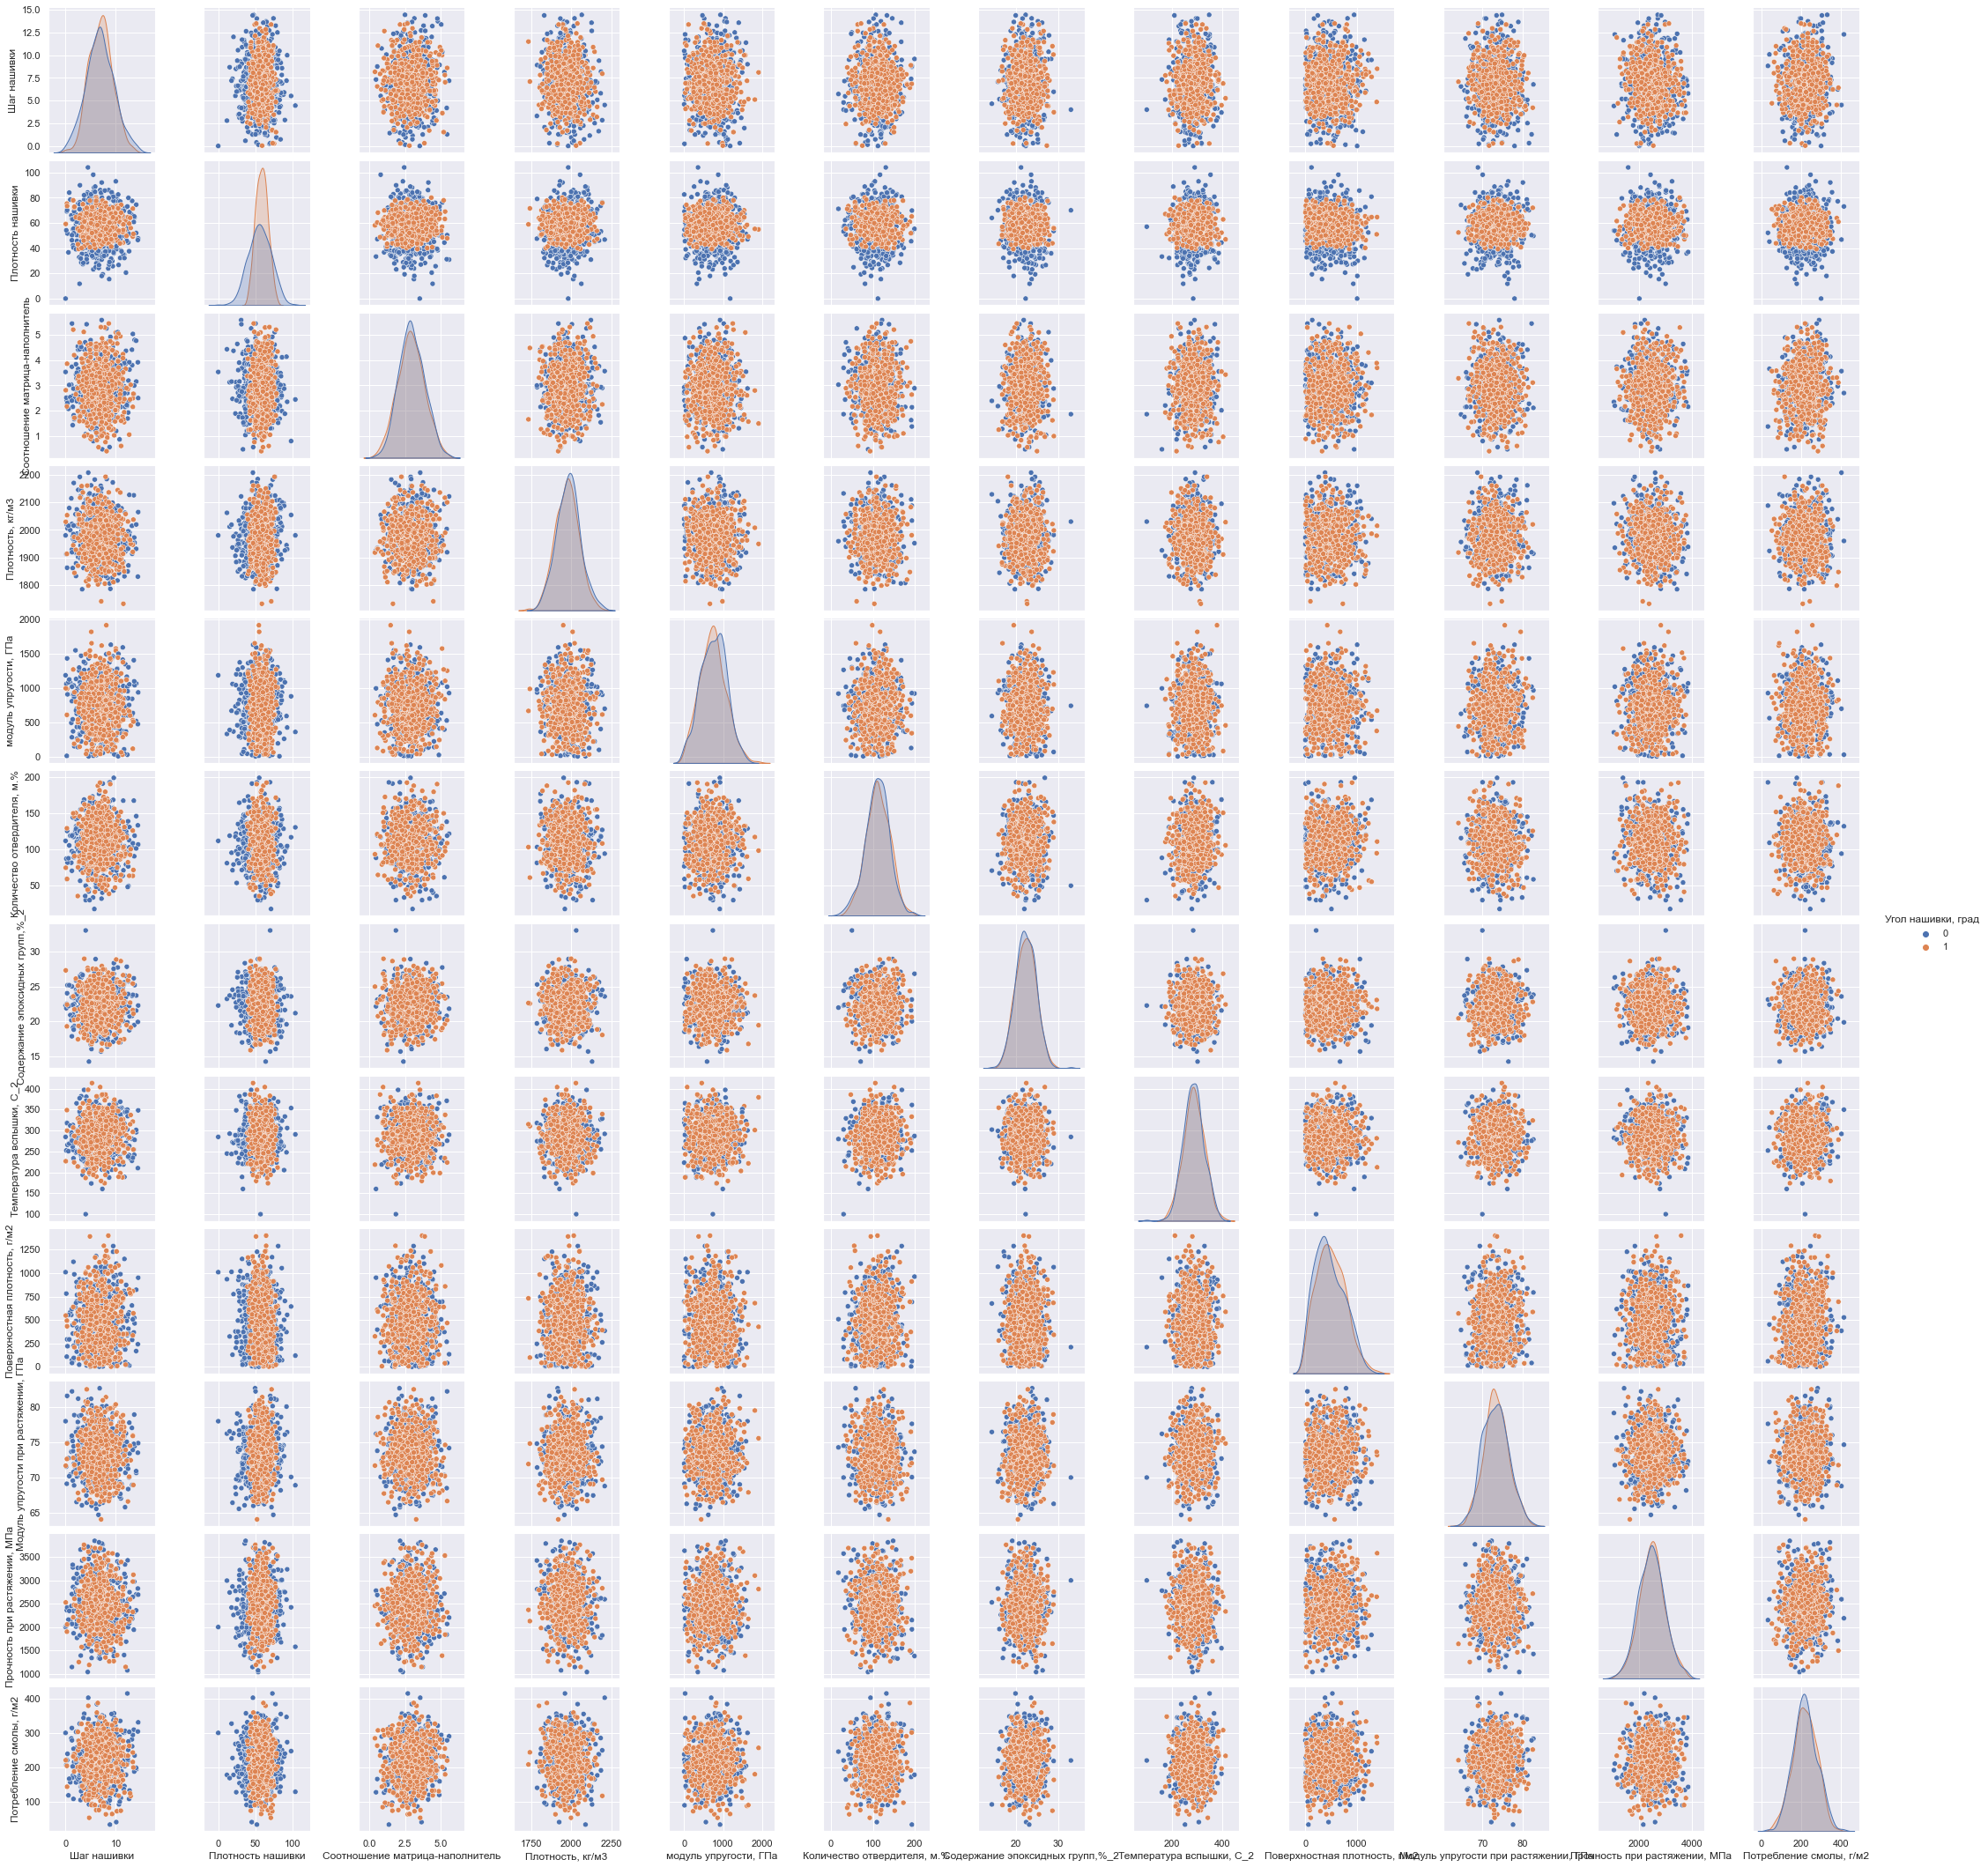

In [19]:
sns.pairplot(df, hue="Угол нашивки, град") # исходя из графиков есть выбросы

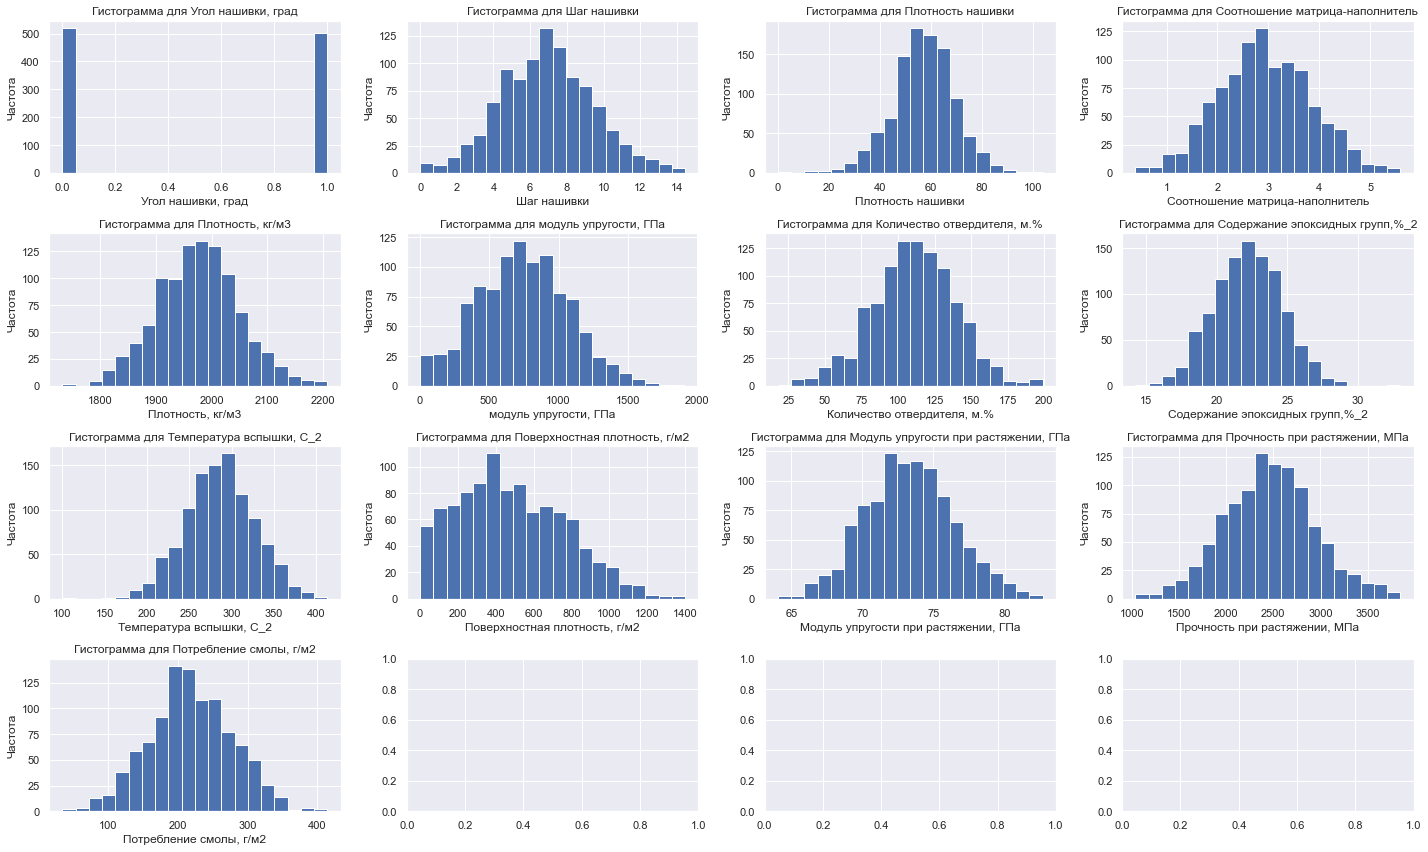

In [20]:
fig, axes = plt.subplots(nrows=4, ncols=4,figsize=(20, 12))
flattened_axes = axes.flatten()

for i, column in enumerate(df.columns):
    flattened_axes[i].hist(df[column], bins=20, edgecolor='white')
    flattened_axes[i].set_title(f"Гистограмма для {column}")
    flattened_axes[i].set_xlabel(column)
    flattened_axes[i].set_ylabel("Частота")

plt.tight_layout()
plt.show()
# распределение данных близко к нормальному 

Выбросы
далее будут рассмотрены три способа работы с выбросами (boxplot, z-scores, Изолирующий лес). На основании визуального анализа графиков выше и boxplot, выявлены признаки с выбросами, которые в дальнейшем были оценены с помощью z-scores и Изолирующего леса. При этом, признаки с большим количеством относительно комплактного расположения точек за пределами усов, не рассматривались как выбросы - принимались как возможный вариант нормы. Рассматривались отдельные точки, находящиеся существенно дальше усов/основной массы точек. Общий объем выбросов в DS несущественный.

### 1. Boxplot

In [21]:
numeric_variables=df.columns[1:]

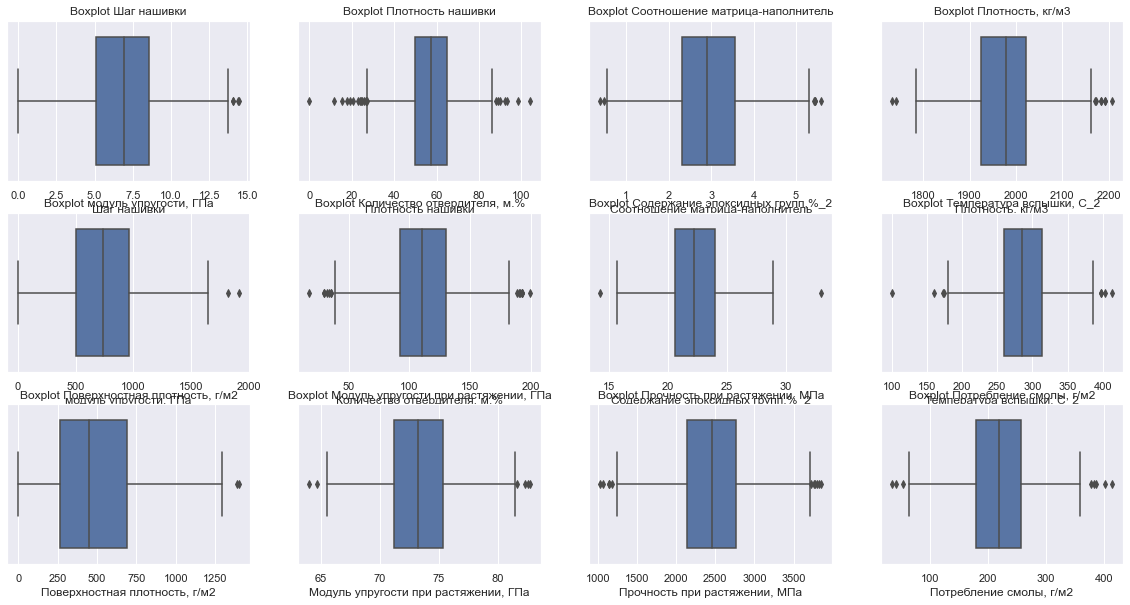

In [22]:
# Создание полотна с подгруппами для боксплотов
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 10))  

# Разворачиваем матрицу графиков и перебираем столбцы
for ax, column in zip(axes.flat, numeric_variables):
    sns.boxplot(x=df[column],ax=ax)
    ax.set_title(f"Boxplot {column}")

plt.show()

In [23]:
outlier_results = []  # считаем то, что лежит за пределами усов. 

for column in numeric_variables:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    IQR = Q3 - Q1
    
    # Левый ус: минимум между расчетной границей и фактическим минимальным значением
    lower_bound = max(df[column].min(), Q1 - 1.5 * IQR)
    
    # Правый ус: максимум между расчетной границей и фактическим максимальным значением
    upper_bound = min(df[column].max(), Q3 + 1.5 * IQR)
    
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    outlier_ratio = round(((len(df) - len(df_no_outliers)) / len(df) * 100), 2)
    
    outlier_results.append({'Column': column, 'Outlier Ratio': outlier_ratio})
    

outlier_results_df = pd.DataFrame(outlier_results)
outlier_results_df

Column  Outlier Ratio
0                            Шаг нашивки           0.39
1                      Плотность нашивки           2.05
2        Соотношение матрица-наполнитель           0.59
3                       Плотность, кг/м3           0.88
4                  модуль упругости, ГПа           0.20
5            Количество отвердителя, м.%           1.37
6        Содержание эпоксидных групп,%_2           0.20
7               Температура вспышки, С_2           0.78
8          Поверхностная плотность, г/м2           0.20
9   Модуль упругости при растяжении, ГПа           0.59
10         Прочность при растяжении, МПа           1.08
11               Потребление смолы, г/м2           0.78

In [24]:
columns_to_check = ['Плотность нашивки', 'Плотность, кг/м3', 'модуль упругости, ГПа','Температура вспышки, С_2',
                   'Поверхностная плотность, г/м2','Содержание эпоксидных групп,%_2', 'Количество отвердителя, м.%', 'Потребление смолы, г/м2']

# Добавляем метки выбросов для столбцов в тот же DataFrame
for column in columns_to_check:
    # Вычисляем квартильные значения и межквартильный размах
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Определяем границы для выбросов
    lower_bound = max(df[column].min(), Q1 - 1.5 * IQR)
    upper_bound = min(df[column].max(), Q3 + 1.5 * IQR)
    
    # Добавляем метку выброса в новую колонку, где 1 - выброс, 0 - нет
    df[f'{column}_box_plot_outlier'] = ((df[column] < lower_bound) | (df[column] > upper_bound)).astype(int)

# Выводим первые строки для проверки новых колонок с метками выбросов
df[[f'{col}_box_plot_outlier' for col in columns_to_check] + columns_to_check].sample(5)

Плотность нашивки_box_plot_outlier  Плотность, кг/м3_box_plot_outlier  \
Index                                                                          
213                                     0                                  0   
132                                     0                                  0   
640                                     0                                  0   
340                                     0                                  0   
807                                     0                                  0   

       модуль упругости, ГПа_box_plot_outlier  \
Index                                           
213                                         0   
132                                         0   
640                                         0   
340                                         0   
807                                         0   

       Температура вспышки, С_2_box_plot_outlier  \
Index                                              
213                                            0   
132                                            0   
640                                            0   
340                                            0   
807                                            0   

       Поверхностная плотность, г/м2_box_plot_outlier  \
Index                                                   
213                                                 0   
132                                                 0   
640                                                 0   
340                                                 0   
807                                                 0   

       Содержание эпоксидных групп,%_2_box_plot_outlier  \
Index                                                     
213                                                   0   
132                                                   0   
640                                                   0   
340                                                   0   
807                                                   0   

       Количество отвердителя, м.%_box_plot_outlier  \
Index                                                 
213                                               0   
132                                               0   
640                                               0   
340                                               0   
807                                               0   

       Потребление смолы, г/м2_box_plot_outlier  Плотность нашивки  \
Index                                                                
213                                           0          59.796446   
132                                           0          45.560075   
640                                           0          51.945279   
340                                           0          62.395748   
807                                           0          41.309351   

       Плотность, кг/м3  модуль упругости, ГПа  Температура вспышки, С_2  \
Index                                                                      
213         1899.218029            1025.931930                279.017391   
132         1987.187948             418.877804                305.712624   
640         1998.709005             760.881311                263.805111   
340         1807.595910             361.022238                275.341718   
807         1966.464630             744.106147                260.915506   

       Поверхностная плотность, г/м2  Содержание эпоксидных групп,%_2  \
Index                                                                   
213                       160.421456                        21.457780   
132                       563.975405                        19.106292   
640                       378.020970                        25.906781   
340                       122.478765                        22.959924   
807                       585.435581                        22.667996   

 

### 2. z-score

In [25]:
numeric_data = df[numeric_variables]

In [26]:
scaler = StandardScaler()

# Применяем Z-преобразование и сохраняем его в виде DataFrame
z_scores = pd.DataFrame(scaler.fit_transform(numeric_data), columns=numeric_data.columns)

In [27]:
z_scores #показывает отклонение значений от среднего

Шаг нашивки  Плотность нашивки  Соотношение матрица-наполнитель  \
0       -1.131530          -0.012469                        -1.175779   
1       -1.131530           0.230546                        -1.175779   
2       -1.131530           1.040595                        -1.175779   
3       -0.741243          -0.822518                        -1.175779   
4       -0.741243          -0.012469                        -0.174232   
...           ...                ...                              ...   
1018     0.849718          -0.820917                        -0.721995   
1019     1.430947          -0.275671                         0.562741   
1020    -1.068634           0.848588                         0.383707   
1021    -0.228717           0.089684                         0.849043   
1022    -0.320161           1.642823                         0.961522   

      Плотность, кг/м3  модуль упругости, ГПа  Количество отвердителя, м.%  \
0             0.736365              -0.003594                    -2.848828   
1             0.736365              -0.003594                    -2.141666   
2             0.736365              -0.003594                    -2.145202   
3             0.736365              -0.003594                     0.651622   
4             0.736365               0.039618                     0.045585   
...                ...                    ...                          ...   
1018         -0.320884               0.523926                    -0.833694   
1019          1.008971              -0.894327                     1.252072   
1020         -0.045622              -0.978843                    -0.001319   
1021          1.235730               0.004703                     1.089990   
1022         -1.157793              -0.977389                     0.658107   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                            0.009757                 -4.542215   
1                            0.626001                 -0.030955   
2                            4.471955                 -0.030955   
3                           -0.413446                  0.344984   
4                            0.009757                 -0.030955   
...                               ...                       ...   
1018                        -0.881925                  0.950375   
1019                        -1.099577                 -0.773808   
1020                         0.712276                 -0.915350   
1021                        -1.246274                 -0.246860   
1022                         2.174679                  0.368264   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                         -0.969964                             -1.067720   
1                         -0.969964                             -1.067720   
2                         -0.969964                             -1.067720   
3                         -0.969964                             -1.067720   
4                         -0.969964                             -1.067720   
...                             ...                                   ...   
1018                      -0.972814                             -0.076219   
1019                      -0.469707                             -0.130794   
1020                       0.915476                              0.450935   
1021                       0.564542                              0.229077   
1022                       0.981645                              0.314722   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  
0                          1.098244                 0.026410  
1                          1.098244                 0.026410  
2                          1.098244                 0.026410  
3                          1.098244                 0.026410  
4                          1.098244                 0.026410  
...                             ...                      ...  
1018                 

In [28]:
# Определяем выбросы по каждому из этих столбцов (добавляем метки как 1 (выброс, отклонение более 3 станд отклонений) и 0 (не выброс))
for column in columns_to_check:   
   df[f'{column}__z_score'] = (np.abs(z_scores[column]) > 3).astype(int)
   
df   


Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
Index                                                       
0                       0     4.000000          57.000000   
1                       0     4.000000          60.000000   
2                       0     4.000000          70.000000   
3                       0     5.000000          47.000000   
4                       0     5.000000          57.000000   
...                   ...          ...                ...   
1018                    1     9.076380          47.019770   
1019                    1    10.565614          53.750790   
1020                    1     4.161154          67.629684   
1021                    1     6.313201          58.261074   
1022                    1     6.078902          77.434468   

       Соотношение матрица-наполнитель  Плотность, кг/м3  \
Index                                                      
0                             1.857143       2030.000000   
1                             1.857143       2030.000000   
2                             1.857143       2030.000000   
3                             1.857143       2030.000000   
4                             2.771331       2030.000000   
...                                ...               ...   
1018                          2.271346       1952.087902   
1019                          3.444022       2050.089171   
1020                          3.280604       1972.372865   
1021                          3.705351       2066.799773   
1022                          3.808020       1890.413468   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
Index                                                       
0                 738.736842                    30.000000   
1                 738.736842                    50.000000   
2                 738.736842                    49.900000   
3                 738.736842                   129.000000   
4                 753.000000                   111.860000   
...                      ...                          ...   
1018              912.855545                    86.992183   
1019              444.732634                   145.981978   
1020              416.836524                   110.533477   
1021              741.475517                   141.397963   
1022              417.316232                   129.183416   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
Index                                                              
0                            22.267857                100.000000   
1                            23.750000                284.615385   
2                            33.000000                284.615385   
3                            21.250000                300.000000   
4                            22.267857                284.615385   
...                                ...                       ...   
1018                         20.123249                324.774576   
1019                         19.599769                254.215401   
1020                         23.957502                248.423047   
1021                         19.246945                275.779840   
1022                         27.474763                300.952708   

       Поверхностная плотность, г/м2  ...  \
Index                                 ...   
0                         210.000000  ...   
1                         210.000000  ...   
2                         210.000000  ...   
3                         210.000000  ...   
4                         210.000000  ...   
...                              ...  ...   
1018                      209.198700  ...   
1019                      350.660830  ...   
1020                      740.142791  ...   
1021                      641.468152  ...   
1022                      758.747882  ...   

       Количество отвердителя, м.%_box_plot_outlier  \
Index                                                 
0                                                 1   
1 

In [29]:
outlier_ratios_z = {col: df[col].mean() * 100 for col in df[[f'{col}__z_score' for col in columns_to_check]]}
outlier_ratios_df_z = pd.DataFrame(list(outlier_ratios_z.items()), columns=['Column', 'Outlier Ratio_z (%)'])
outlier_ratios_df_z 


Column  Outlier Ratio_z (%)
0                Плотность нашивки__z_score             0.684262
1                 Плотность, кг/м3__z_score             0.293255
2            модуль упругости, ГПа__z_score             0.195503
3         Температура вспышки, С_2__z_score             0.293255
4    Поверхностная плотность, г/м2__z_score             0.195503
5  Содержание эпоксидных групп,%_2__z_score             0.195503
6      Количество отвердителя, м.%__z_score             0.195503
7          Потребление смолы, г/м2__z_score             0.293255

### 3. Изолирующий лес

In [30]:
scaler = MinMaxScaler()

In [31]:
normalized_df = df.copy()  # Создаем копию исходного DataFrame
normalized_df[numeric_data.columns] = scaler.fit_transform(numeric_data)
normalized_df.sample(10)

Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
Index                                                       
416                     0     0.368085           0.538559   
347                     0     0.338931           0.406009   
519                     0     0.243450           0.272938   
253                     0     0.117318           0.665948   
158                     0     0.079481           0.634152   
84                      0     0.455743           0.288003   
165                     0     0.392308           0.846941   
415                     0     0.359935           0.590795   
245                     0     0.607479           0.696392   
578                     1     0.661989           0.681340   

       Соотношение матрица-наполнитель  Плотность, кг/м3  \
Index                                                      
416                           0.514489          0.607265   
347                           0.333508          0.502011   
519                           0.421354          0.517707   
253                           0.400509          0.496688   
158                           0.506879          0.803914   
84                            0.483225          0.604687   
165                           0.501346          0.768845   
415                           0.647635          0.724434   
245                           0.565523          0.555833   
578                           0.518109          0.559766   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
Index                                                       
416                 0.483071                     0.391516   
347                 0.285150                     0.827781   
519                 0.513273                     0.810251   
253                 0.450111                     0.560066   
158                 0.255599                     0.352599   
84                  0.144398                     0.432116   
165                 0.579047                     0.611752   
415                 0.516377                     0.504754   
245                 0.259203                     0.586170   
578                 0.385080                     0.444742   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
Index                                                              
416                           0.562677                  0.615171   
347                           0.323883                  0.556811   
519                           0.462908                  0.429267   
253                           0.438950                  0.542926   
158                           0.315669                  0.621887   
84                            0.291295                  0.650610   
165                           0.555062                  0.519087   
415                           0.320109                  0.443575   
245                           0.409567                  0.444433   
578                           0.425489                  0.673609   

       Поверхностная плотность, г/м2  ...  \
Index                                 ...   
416                         0.454797  ...   
347                         0.250494  ...   
519                         0.564631  ...   
253                         0.456736  ...   
158                         0.395448  ...   
84                          0.729844  ...   
165                         0.289508  ...   
415                         0.075889  ...   
245                         0.191774  ...   
578                         0.506692  ...   

       Количество отвердителя, м.%_box_plot_outlier  \
Index                                                 
416                                               0   
347                                               0   
519                                               0   
253                                               0   
158                                               0   
84                                                0   
165                   

In [32]:
# Выбираем нужные столбцы для анализа выбросов
features = normalized_df[['Плотность нашивки', 'Плотность, кг/м3', 'модуль упругости, ГПа','Температура вспышки, С_2',
                    'Поверхностная плотность, г/м2','Содержание эпоксидных групп,%_2', 'Количество отвердителя, м.%', 'Потребление смолы, г/м2']]

# Инициализируем и обучаем модель Isolation Forest
iso_forest = IsolationForest(contamination=0.02, random_state=42)
outliers = iso_forest.fit_predict(features)

# Добавим результаты в DataFrame для дальнейшей визуализации
normalized_df['IF_Outlier'] = outliers

normalized_df['IF_Outlier'] = normalized_df['IF_Outlier'].apply(lambda x: 0 if x == 1 else 1)

In [33]:
normalized_df
#больше всего выбросов идентифицировано при помощи изоляционного леса

Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
Index                                                       
0                       0     0.276998           0.548135   
1                       0     0.276998           0.576985   
2                       0     0.276998           0.673149   
3                       0     0.346248           0.451971   
4                       0     0.346248           0.548135   
...                   ...          ...                ...   
1018                    1     0.628535           0.452161   
1019                    1     0.731664           0.516890   
1020                    1     0.288158           0.650355   
1021                    1     0.437186           0.560262   
1022                    1     0.420961           0.744642   

       Соотношение матрица-наполнитель  Плотность, кг/м3  \
Index                                                      
0                             0.282131          0.626533   
1                             0.282131          0.626533   
2                             0.282131          0.626533   
3                             0.282131          0.626533   
4                             0.457857          0.626533   
...                                ...               ...   
1018                          0.361750          0.462855   
1019                          0.587163          0.668737   
1020                          0.555750          0.505470   
1021                          0.637396          0.703842   
1022                          0.657131          0.333290   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
Index                                                       
0                   0.385679                     0.067654   
1                   0.385679                     0.178021   
2                   0.385679                     0.177469   
3                   0.385679                     0.613972   
4                   0.393150                     0.519387   
...                      ...                          ...   
1018                0.476884                     0.382158   
1019                0.231678                     0.707685   
1020                0.217065                     0.512067   
1021                0.387114                     0.682389   
1022                0.217317                     0.614984   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
Index                                                              
0                             0.427467                  0.000000   
1                             0.506535                  0.589311   
2                             1.000000                  0.589311   
3                             0.373167                  0.638420   
4                             0.427467                  0.589311   
...                                ...                       ...   
1018                          0.313057                  0.717503   
1019                          0.285131                  0.492271   
1020                          0.517605                  0.473781   
1021                          0.266309                  0.561107   
1022                          0.705242                  0.641461   

       Поверхностная плотность, г/м2  ...  \
Index                                 ...   
0                           0.149682  ...   
1                           0.149682  ...   
2                           0.149682  ...   
3                           0.149682  ...   
4                           0.149682  ...   
...                              ...  ...   
1018                        0.149109  ...   
1019                        0.250230  ...   
1020                        0.528643  ...   
1021                        0.458108  ...   
1022                        0.541942  ...   

       Потребление смолы, г/м2_box_plot_outlier  Плотность нашивки__z_score  \
Index                                                                         
0        

In [34]:
outlier_ratios_IF = round((normalized_df['IF_Outlier'].mean() * 100),2)
print(f"outlier_ratios_IF = {outlier_ratios_IF} %")

outlier_ratios_IF = 2.05 %


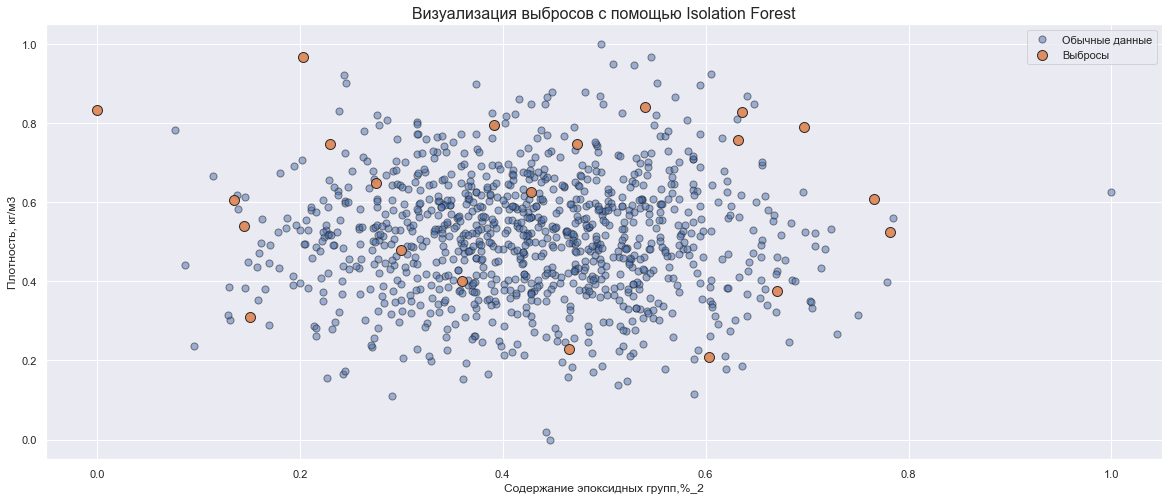

In [35]:
# Визуализация выбросов с использованием Isolation Forest
plt.figure(figsize=(20, 8))

# Основные данные (обычные точки)
plt.scatter(normalized_df[normalized_df['IF_Outlier'] == 0]['Содержание эпоксидных групп,%_2'],
            normalized_df[normalized_df['IF_Outlier'] == 0]['Плотность, кг/м3'],
            edgecolor='k', s=50, alpha=0.5, label="Обычные данные")

# Выбросы
plt.scatter(normalized_df[normalized_df['IF_Outlier'] == 1]['Содержание эпоксидных групп,%_2'],
            normalized_df[normalized_df['IF_Outlier'] == 1]['Плотность, кг/м3'],
            edgecolor='k', s=100, alpha=0.9, label="Выбросы")

# Настройки графика
plt.title("Визуализация выбросов с помощью Isolation Forest", fontsize=16)
plt.xlabel('Содержание эпоксидных групп,%_2')
plt.ylabel('Плотность, кг/м3')
plt.legend()
plt.grid(True)


plt.show()

In [36]:
# удаляем выбросы из DS
normalized_df_without_outliers = normalized_df.drop(normalized_df[(normalized_df['IF_Outlier'] == 1) | 
                                                                  (normalized_df['Потребление смолы, г/м2__z_score'] == 1) |
                                                                  (normalized_df['Количество отвердителя, м.%__z_score'] == 1) |
                                                                  (normalized_df['Содержание эпоксидных групп,%_2__z_score'] == 1) |
                                                                  (normalized_df['Поверхностная плотность, г/м2__z_score'] == 1) |
                                                                  (normalized_df['модуль упругости, ГПа__z_score'] == 1) |
                                                                  (normalized_df['Плотность, кг/м3__z_score'] == 1) |
                                                                  (normalized_df['Плотность нашивки__z_score'] == 1) |
                                                                  (normalized_df['Температура вспышки, С_2__z_score'] == 1) |
                                                                  (normalized_df['Потребление смолы, г/м2_box_plot_outlier'] == 1) |
                                                                  (normalized_df['Количество отвердителя, м.%_box_plot_outlier'] == 1) |
                                                                  (normalized_df['Содержание эпоксидных групп,%_2_box_plot_outlier'] == 1) |
                                                                  (normalized_df['Поверхностная плотность, г/м2_box_plot_outlier'] == 1) |
                                                                  (normalized_df['Температура вспышки, С_2_box_plot_outlier'] == 1) |
                                                                  (normalized_df['модуль упругости, ГПа_box_plot_outlier'] == 1) |
                                                                  (normalized_df['Плотность, кг/м3_box_plot_outlier'] == 1) |
                                                                  (normalized_df['Плотность нашивки_box_plot_outlier'] == 1)].index)

                 

In [37]:
normalized_df_without_outliers.shape

(948, 30)

In [38]:
normalized_df_without_outliers = normalized_df_without_outliers.drop(columns=['Плотность нашивки_box_plot_outlier', 'Плотность, кг/м3_box_plot_outlier',
                                                                      'модуль упругости, ГПа_box_plot_outlier', 'Температура вспышки, С_2_box_plot_outlier',
                                                                       'Поверхностная плотность, г/м2_box_plot_outlier', 'Содержание эпоксидных групп,%_2_box_plot_outlier',
                                                                       'Количество отвердителя, м.%_box_plot_outlier', 'Потребление смолы, г/м2_box_plot_outlier',
                                                                       'Плотность нашивки__z_score', 'Плотность, кг/м3__z_score', 'модуль упругости, ГПа__z_score',
                                                                        'Температура вспышки, С_2__z_score', 'Поверхностная плотность, г/м2__z_score',
                                                                        'Содержание эпоксидных групп,%_2__z_score', 'Количество отвердителя, м.%__z_score',
                                                                        'Потребление смолы, г/м2__z_score', 'IF_Outlier'])
# удаляем вспомогательные колонки с метками

In [39]:
normalized_df_without_outliers.describe()

Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
count          948.000000   948.000000         948.000000   
mean             0.508439     0.477988           0.551735   
std              0.500193     0.176963           0.107799   
min              0.000000     0.002606           0.262268   
25%              0.000000     0.351836           0.481842   
50%              1.000000     0.480148           0.553395   
75%              1.000000     0.594517           0.621855   
max              1.000000     1.000000           0.827131   

       Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                       948.000000        948.000000   
mean                          0.490183          0.508577   
std                           0.175294          0.148254   
min                           0.000000          0.110749   
25%                           0.370964          0.402680   
50%                           0.484284          0.515442   
75%                           0.609063          0.605487   
max                           1.000000          0.902926   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count             948.000000                   948.000000   
mean                0.387161                     0.514247   
std                 0.169225                     0.146299   
min                 0.000000                     0.115490   
25%                 0.263210                     0.415220   
50%                 0.387411                     0.513862   
75%                 0.502443                     0.617369   
max                 0.851482                     0.905499   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                       948.000000                948.000000   
mean                          0.424083                  0.594016   
std                           0.125074                  0.126011   
min                           0.076869                  0.253371   
25%                           0.337594                  0.508341   
50%                           0.423031                  0.593576   
75%                           0.517522                  0.680010   
max                           0.784214                  0.913158   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                     948.000000                            948.000000   
mean                        0.341347                              0.496745   
std                         0.196656                              0.165879   
min                         0.000000                              0.000000   
25%                         0.188622                              0.386234   
50%                         0.323308                              0.494158   
75%                         0.492261                              0.604490   
max                         0.922654                              1.000000   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  
count                     948.000000               948.000000  
mean                        0.508789                 0.483438  
std                         0.171251                 0.151179  
min                         0.000000                 0.078476  
25%                         0.393721                 0.383440  
50%                         0.504740                 0.486849  
75%                         0.612575                 0.585765  
max                         1.000000                 0.854149

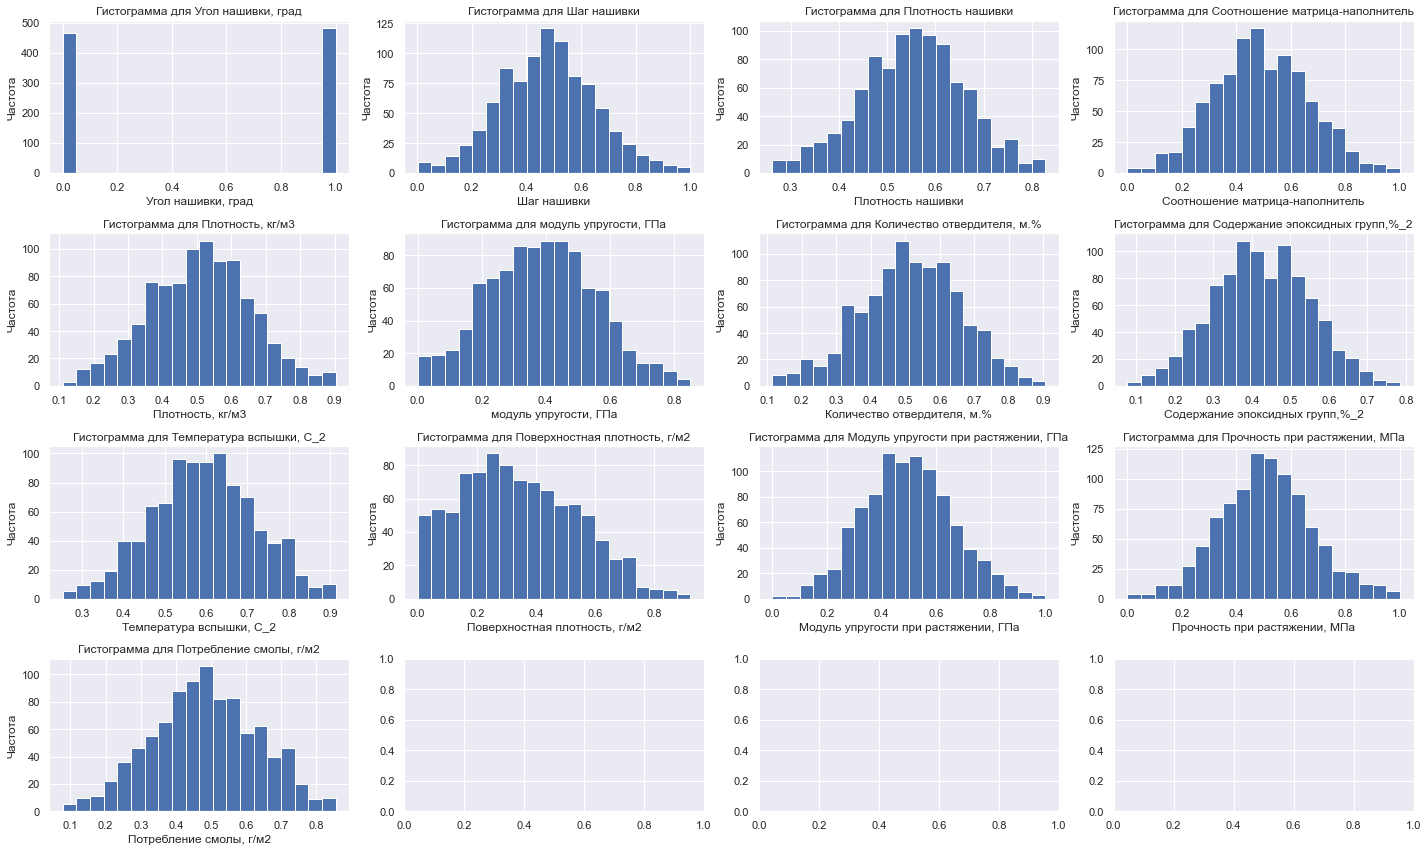

In [40]:
# графики после нормализации и удаления выбросов
fig, axes = plt.subplots(nrows=4, ncols=4,figsize=(20, 12))
flattened_axes = axes.flatten()

for i, column in enumerate(normalized_df_without_outliers.columns):
    flattened_axes[i].hist(normalized_df_without_outliers[column], bins=20, edgecolor='white')
    flattened_axes[i].set_title(f"Гистограмма для {column}")
    flattened_axes[i].set_xlabel(column)
    flattened_axes[i].set_ylabel("Частота")

plt.tight_layout()
plt.show()

In [41]:
duplicates = normalized_df_without_outliers[normalized_df_without_outliers.duplicated(keep=False)]
print(duplicates)
# дубликаты строк отсутствуют

Empty DataFrame
Columns: [Угол нашивки, град, Шаг нашивки, Плотность нашивки, Соотношение матрица-наполнитель, Плотность, кг/м3, модуль упругости, ГПа, Количество отвердителя, м.%, Содержание эпоксидных групп,%_2, Температура вспышки, С_2, Поверхностная плотность, г/м2, Модуль упругости при растяжении, ГПа, Прочность при растяжении, МПа, Потребление смолы, г/м2]
Index: []


## Построение модели

Используются следующие модели.
1. Линейная регрессия — это один из самых простых и широко используемых методов машинного обучения. 
2. Деревья решений - принцип работы заключается в разделении данных на подмножества на основе правил принятия решений, выведенных из входных признаков. Каждое разбиение делается так, чтобы минимизировать ошибку в предсказании целевой переменной. 
3. Случайный лес —  это алгоритм машинного обучения, основанный на объединении множества деревьев решений для улучшения точности и устойчивости модели.
4. Нейронная сеть - архитектура из простых вычислительных блоков (нейронов), которая определяет и реализует функциональную зависимость между данными на входе и выходе.

In [42]:
X = normalized_df_without_outliers.drop(columns=['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'])
Y = normalized_df_without_outliers.iloc[:,-3:-1]

# Выведем формы X и Y, чтобы убедиться, что задание Х и Y выполнено корректно
X.shape, Y.shape

((948, 11), (948, 2))

In [43]:
Y

Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа
Index                                                                     
1                                  0.319194                       0.698235
3                                  0.319194                       0.698235
4                                  0.319194                       0.698235
5                                  0.319194                       0.698235
6                                  0.319194                       0.698235
...                                     ...                            ...
1018                               0.485125                       0.480312
1019                               0.475992                       0.470745
1020                               0.573346                       0.578340
1021                               0.536217                       0.368070
1022                               0.550550                       0.647135

[948 rows x 2 columns]

In [44]:
X


Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
Index                                                       
1                       0     0.276998           0.576985   
3                       0     0.346248           0.451971   
4                       0     0.346248           0.548135   
5                       0     0.346248           0.576985   
6                       0     0.346248           0.673149   
...                   ...          ...                ...   
1018                    1     0.628535           0.452161   
1019                    1     0.731664           0.516890   
1020                    1     0.288158           0.650355   
1021                    1     0.437186           0.560262   
1022                    1     0.420961           0.744642   

       Соотношение матрица-наполнитель  Плотность, кг/м3  \
Index                                                      
1                             0.282131          0.626533   
3                             0.282131          0.626533   
4                             0.457857          0.626533   
5                             0.457201          0.563509   
6                             0.419084          0.374437   
...                                ...               ...   
1018                          0.361750          0.462855   
1019                          0.587163          0.668737   
1020                          0.555750          0.505470   
1021                          0.637396          0.703842   
1022                          0.657131          0.333290   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
Index                                                       
1                   0.385679                     0.178021   
3                   0.385679                     0.613972   
4                   0.393150                     0.519387   
5                   0.390531                     0.519387   
6                   0.421436                     0.519387   
...                      ...                          ...   
1018                0.476884                     0.382158   
1019                0.231678                     0.707685   
1020                0.217065                     0.512067   
1021                0.387114                     0.682389   
1022                0.217317                     0.614984   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
Index                                                              
1                             0.506535                  0.589311   
3                             0.373167                  0.638420   
4                             0.427467                  0.589311   
5                             0.427467                  0.589311   
6                             0.427467                  0.589311   
...                                ...                       ...   
1018                          0.313057                  0.717503   
1019                          0.285131                  0.492271   
1020                          0.517605                  0.473781   
1021                          0.266309                  0.561107   
1022                          0.705242                  0.641461   

       Поверхностная плотность, г/м2  Потребление смолы, г/м2  
Index                                                          
1                           0.149682                 0.488979  
3                           0.149682                 0.488979  
4                           0.149682                 0.488979  
5                           0.149682                 0.488979  
6                           0.149682                 0.488979  
...                              ...                      ...  
1018                        0.149109                 0.239516  
1019                        0.250230                 0.220404  
1020                        0.528643                 0.532590  
1021                        0.458108             

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.3,
                                                    random_state = 42) # разделяем DS на обучающую и тестовую выборки

In [46]:
X_train.shape

(663, 11)

In [47]:
# с помощью Grid подбираются наилучшие параметры каждой модели
np.random.seed(42)

#1.
# параметры модели LinearRegression: 'copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'
param_grid = {'copy_X': [True],
              'fit_intercept': [True, False]
              }

linearRegression = LinearRegression()
grid_search = GridSearchCV(estimator=linearRegression, param_grid=param_grid, scoring='neg_mean_absolute_error', cv =10, verbose=True)
grid_search.fit(X_train, y_train)
best_linearRegression = grid_search.best_estimator_

#2.
# параметры модели DecisionTreeRegressor: 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease',
# 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'

param_grid_2 = {'ccp_alpha': [0.0, 0.1,.01, .001],
                'max_features': ['auto', 'sqrt', 'log2']
                }

tree_model = DecisionTreeRegressor(random_state=42)
grid_search_2 = GridSearchCV(estimator=tree_model, param_grid=param_grid_2, scoring='neg_mean_absolute_error', cv =10, verbose=True)
grid_search_2.fit(X_train, y_train)
best_tree_model = grid_search_2.best_estimator_

#3.
# параметры модели RandomForestRegressor: 'bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples',
#'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 
#'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'

param_grid_3 = {'n_estimators': [25, 50, 100],
                'ccp_alpha': [0.0, 0.1,.01, .001],
                'max_features': ['auto', 'sqrt', 'log2'],
                'n_jobs': [-1]
                }

forest_model = RandomForestRegressor(random_state=42)
grid_search_3 = GridSearchCV(estimator=forest_model, param_grid=param_grid_3, scoring='neg_mean_absolute_error', cv =10, verbose=True)
grid_search_3.fit(X_train, y_train)
best_forest_model = grid_search_3.best_estimator_




Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 36 candidates, totalling 360 fits


In [48]:
print(best_linearRegression)
print(best_tree_model)
print(best_forest_model)

LinearRegression()
DecisionTreeRegressor(ccp_alpha=0.1, max_features='auto', random_state=42)
RandomForestRegressor(ccp_alpha=0.1, n_estimators=50, n_jobs=-1,
                      random_state=42)


## Оценка моделей

In [49]:
# делаем предсказания по моделям на тестовых данных
preds_linearRegression_model = best_linearRegression.predict(X_test)
preds_tree_model = best_tree_model.predict(X_test)
preds_forest_model = best_forest_model.predict(X_test)

####  Оцениваем ошибки (MSE,MAE, R^2)

In [50]:
#MSE (среднеквадратическая ошибка)
linearRegression_mse = mean_squared_error(y_test, preds_linearRegression_model)
tree_mse = mean_squared_error(y_test, preds_tree_model)
forest_mse = mean_squared_error(y_test, preds_forest_model)

print(linearRegression_mse)
print(tree_mse)
print(forest_mse)

0.029052274982763977
0.028802737570052153
0.028800821290308653


In [51]:
#MAE(средняя абсолютная ошибка предсказанных значений от истинных значений)
linearRegression_mae = mean_absolute_error(y_test, preds_linearRegression_model)
tree_mae = mean_absolute_error(y_test, preds_tree_model)
forest_mae = mean_absolute_error(y_test, preds_forest_model)

print(linearRegression_mae)
print(tree_mae)
print(forest_mae)

0.1378091561521832
0.13599336549493313
0.13599505673219053


In [52]:
y_test.mean()

Модуль упругости при растяжении, ГПа    0.494994
Прочность при растяжении, МПа           0.507176
dtype: float64

In [53]:
#сравниваем среднюю абсолютную ошибку со средним значением y и получаем точность модели в %%

models_accuracy_lr = (1 - linearRegression_mae/y_test.mean()) * 100
models_accuracy_tree =  (1 - tree_mae/y_test.mean()) * 100
models_accuracy_forest = (1 - forest_mae/y_test.mean()) * 100

print(models_accuracy_lr)
print(models_accuracy_tree)
print(models_accuracy_forest)

Модуль упругости при растяжении, ГПа    72.159407
Прочность при растяжении, МПа           72.828130
dtype: float64
Модуль упругости при растяжении, ГПа    72.526239
Прочность при растяжении, МПа           73.186150
dtype: float64
Модуль упругости при растяжении, ГПа    72.525897
Прочность при растяжении, МПа           73.185817
dtype: float64


In [54]:
# R2 (коэффициент детерминации)
r2_linearRegression = r2_score(y_test, preds_linearRegression_model)
r2_tree = r2_score(y_test, preds_tree_model)
r2_forest = r2_score(y_test, preds_forest_model)

print(r2_linearRegression)
print(r2_tree)
print(r2_forest)

-0.008624857901655014
-0.0002036163246389444
-0.00012787063456787262


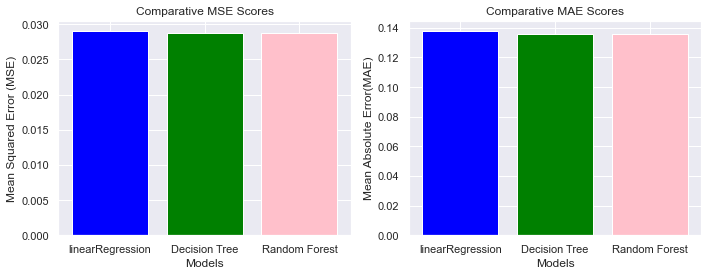

In [55]:
# Визуализируем оценки
plt.figure(figsize=(10, 4))
models = ['linearRegression', 'Decision Tree', 'Random Forest']
mse_scores = [linearRegression_mse, tree_mse, forest_mse]
mae_scores = [linearRegression_mae, tree_mae, forest_mae]
r2_scores = [r2_linearRegression, r2_tree, r2_forest]
model_accuracy = [models_accuracy_lr, models_accuracy_tree, models_accuracy_forest]

# Plot MSE
plt.subplot(1, 2, 1)
plt.bar(models, mse_scores, color=['blue', 'green', 'pink'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparative MSE Scores')

# Plot MAE
plt.subplot(1, 2, 2)
plt.bar(models, mae_scores, color=['blue', 'green', 'pink'])
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error(MAE)')
plt.title('Comparative MAE Scores')

plt.tight_layout()
plt.show()



In [56]:
item_to_check = 1 # проверка предсказаний модели
print(X_test.iloc[item_to_check].to_string())
print()
print(y_test.iloc[item_to_check])

Угол нашивки, град                 1.000000
Шаг нашивки                        0.477252
Плотность нашивки                  0.482838
Соотношение матрица-наполнитель    0.348027
Плотность, кг/м3                   0.638983
модуль упругости, ГПа              0.749211
Количество отвердителя, м.%        0.340766
Содержание эпоксидных групп,%_2    0.247186
Температура вспышки, С_2           0.565007
Поверхностная плотность, г/м2      0.281322
Потребление смолы, г/м2            0.817417

Модуль упругости при растяжении, ГПа    0.494672
Прочность при растяжении, МПа           0.943372
Name: 1008, dtype: float64


In [58]:
best_linearRegression.predict(X_test.iloc[item_to_check:item_to_check+1]) # предсказание на основании лин. регрессии

array([[0.52439132, 0.54335241]])

In [59]:
best_tree_model.predict(X_test.iloc[item_to_check:item_to_check+1]) # предсказание на основании дерева решений

array([[0.49749743, 0.50948178]])

In [60]:
best_forest_model.predict(X_test.iloc[item_to_check:item_to_check+1]) # предсказание на основании случайного леса

array([[0.49601394, 0.50976675]])

#### Сохранение модели LinearRegresson

In [61]:
min_max_scaler_x = MinMaxScaler()
min_max_scaler_y = MinMaxScaler()

min_max_scaler_x.fit(normalized_df_without_outliers.drop(columns=['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа']))
min_max_scaler_y.fit(normalized_df_without_outliers.iloc[:,-3:-1])

MinMaxScaler()

In [62]:
with open ("best_linearRegression.pkl","wb") as f:
    pickle.dump(best_linearRegression, f)

In [63]:
with open("scaler_x.pkl", "wb") as f:
    pickle.dump(min_max_scaler_x, f)

In [64]:
with open("scaler_y.pkl", "wb") as f:
    pickle.dump(min_max_scaler_y, f)

## Нейронная сеть (рекомендация соотношения матрица-наполнитель).

In [65]:
X_net = normalized_df_without_outliers.drop(columns=['Соотношение матрица-наполнитель'])
Y_net = normalized_df_without_outliers['Соотношение матрица-наполнитель']

In [66]:
X_train_net, X_test_net, y_train_net, y_test_net = train_test_split(X_net, Y_net,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [67]:
n_features = X_train_net.shape[1]

In [68]:
model = Sequential()
model.add(Input((n_features,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1300      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 11,501
Trainable params: 11,501
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(0.0001))

In [70]:
history = model.fit(X_train_net, 
                    y_train_net, 
                    validation_data = (X_test_net, y_test_net),
                    callbacks = [keras.callbacks.EarlyStopping(min_delta=0.0001,
                                                               patience=10,
                                                               verbose=1, 
                                                               restore_best_weights=True)],
                    epochs=300, 
                    verbose=1)

Epoch 1/300
21/21 [==============================] - 3s 47ms/step - loss: 0.2809 - val_loss: 0.2480
Epoch 2/300
21/21 [==============================] - 0s 6ms/step - loss: 0.2809 - val_loss: 0.2480
Epoch 3/300
21/21 [==============================] - 0s 5ms/step - loss: 0.2809 - val_loss: 0.2480
Epoch 4/300
21/21 [==============================] - 0s 6ms/step - loss: 0.2809 - val_loss: 0.2480
Epoch 5/300
21/21 [==============================] - 0s 6ms/step - loss: 0.2809 - val_loss: 0.2480
Epoch 6/300
21/21 [==============================] - 0s 6ms/step - loss: 0.2809 - val_loss: 0.2480
Epoch 7/300
21/21 [==============================] - 0s 7ms/step - loss: 0.2809 - val_loss: 0.2480
Epoch 8/300
21/21 [==============================] - 0s 8ms/step - loss: 0.2809 - val_loss: 0.2480
Epoch 9/300
21/21 [==============================] - 0s 8ms/step - loss: 0.2809 - val_loss: 0.2480
Epoch 10/300
21/21 [==============================] - 0s 6ms/step - loss: 0.2809 - val_loss: 0.2480
Epoch 11

In [71]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

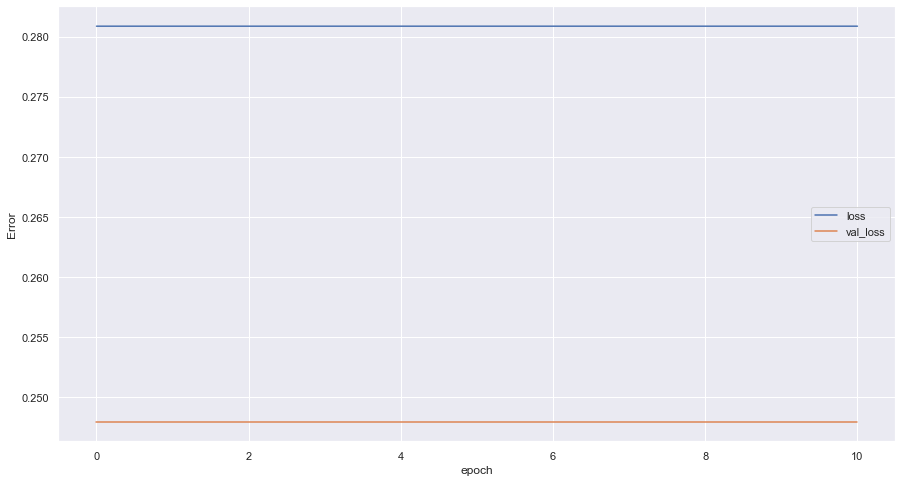

In [72]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()


### Оценка модели

In [73]:
y_pred = model.predict(X_test_net)

In [74]:
MAE = mean_absolute_error(y_test_net, y_pred)
MSE = mean_squared_error(y_test_net, y_pred)
r2 = r2_score(y_test_net, y_pred)


In [75]:
models_accuracy_nr = (1 - MAE/y_test_net.mean()) * 100

In [76]:
print(MAE)
print(MSE)
print(r2)
print(models_accuracy_nr)

0.4669065256603902
0.2479702556725533
-7.274348921992546
0.0
